## 서론

- 기존 인식: 중고로 많이 올라온 상품은 부정적
- 하지만 최근 __중고거래 시장__ 이 성장하고 있는 추세 -> 기업의 입장에서 중고시장 __트렌드 분석__ 각광
- 중고나라 거래들을 분석하면 __유용한 데이터__ 들을 얻을 수 있을것
    - (구체적으로는 중고시장에 한정된 트렌드라고 생각할 수도 있겠지만, 정식 오프라인 매장과 비슷한 트렌드를 보일 수 있을 것)

### 티켓(도서, 기프티콘)
- 일단 중고나라에서 자료 긁어오기 (제목)
- 주제(menuid=)
    - 영화/연극/공연(1285), 스포츠/기타 티켓(1286), 시즌권/리프트권(1537)
    - 도서아동어린이(461), 도서학습교육(343), 소설만화(460), 문학실용(464), 인문교양(459)

- 출처: 
https://cafe.naver.com/joonggonara?iframe_url=/ArticleList.nhn%3Fsearch.clubid=10050146%26search.menuid=1285%26userDisplay=50%26search.boardtype=L%26search.specialmenutype=%26search.totalCount=501%26search.cafeId=10050146%26search.page=1

In [12]:
# 모듈 로딩
%pip install selenium
import time
import pandas as pd
from bs4 import BeautifulSoup
import requests
from selenium import webdriver
from selenium.webdriver.common.by import By
from datetime import datetime
from urllib.parse import quote_plus as qp
import matplotlib.pyplot as plt
PATH = '../home/chromedriver'


# num = 1  # num은 1부터 1000까지 생각
# url = f'https://cafe.naver.com/joonggonara?iframe_url=/ArticleList.nhn%3Fsearch.clubid=10050146%26search.menuid={1285}%26userDisplay=50%26search.boardtype=L%26search.specialmenutype=%26search.totalCount=501%26search.cafeId=10050146%26search.page={num}'

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
1285
1286
461
343
460
464
459


#### 카테고리 분류

In [19]:
# 영화/연극/공연(1285), 스포츠/기타 티켓(1286), 도서아동어린이(461), 도서학습교육(343), 소설만화(460), 문학실용(464), 인문교양(459)
# 1285, 1286, 1156 기준으로 하자. 
category = {1285 : '영화/연극/공연' , 1286 : '스포츠/기타 티켓', 461: '도서아동어린이', 343: '도서학습교육', 460 : '소설만화', 464: '문학실용', 459 : '인문교양', 1156 : '모바일상품권/쿠폰'}
query = {1285 : '양도 | 티켓 | 연석 | 연극 | 뮤지컬 | 영화 | 공연 | 가능 | 팝니다 | 판매 | 콘서트 | 예매 | 롯데 | 택포' , 1286 : '양도 | 티켓 | 연석 | 연극 | 뮤지컬 | 영화 | 공연 | 가능 | 팝니다 | 판매 | 콘서트 | 예매 | 롯데 | 택포', 461: '책 | 판매 | 권 | 팝니다 | 택포', 343: '책 | 판매 | 권 | 팝니다 | 택포', 460 : '책 | 판매 | 권 | 팝니다 | 택포', 464: '책 | 판매 | 권 | 팝니다 | 택포', 459 : '책 | 판매 | 권 | 팝니다 | 택포', 1156: '팔아요 | 양도 | 팝니다 | 기프티콘 | 권 | 쿠폰'}
for i in category.keys():
    print(i)

1285
1286
461
343
460
464
459


## 네이버 카페 크롤링

In [40]:
def login():
    # 드라이버 경로 불러오기
    driver = webdriver.Chrome()

    # 로그인 정보
    login_url = 'https://nid.naver.com/nidlogin.login'
    naver_id = "wng1737"
    naver_pw = "xhxl801347"

    # 드라이버 실행 후 로그인
    driver.get(login_url)
    driver.implicitly_wait(2)

    # execute_script 함수 사용하여 자바스크립트로 id,pw 넘겨주기
    driver.execute_script("document.getElementsByName('id')[0].value=\'" + naver_id + "\'")
    driver.execute_script("document.getElementsByName('pw')[0].value=\'" + naver_pw + "\'")

    # 로그인 버튼 클릭하기
    driver.find_element(By.ID, 'log.login').click()
    time.sleep(1)
    return driver

# 크롤링 진행하려는 카페 주소(중고나라)

# 영화/연극/공연(1285), 스포츠/기타 티켓(1286), 도서아동어린이(461), 도서학습교육(343), 소설만화(460), 문학실용(464), 인문교양(459)
def data_receive(driver, category_num):
    article_list = []
    transform = qp(query[category_num], encoding='cp949')
    # 날짜 리스트 만들기
    dtRange = pd.date_range(start='2021-07-01', end='2022-06-30').astype(str)
    for day in dtRange:
        num = 1
        while True:
            cafe_url = f'https://cafe.naver.com/joonggonara?iframe_url=/ArticleSearchList.nhn%3Fsearch.clubid=10050146%26search.menuid={category_num}%26search.media=0%26search.searchdate={day}{day}%26search.defaultValue=1%26search.exact=%26search.include=%26userDisplay=15%26search.exclude=%26search.onSale=1%26search.option=3%26search.sortBy=date%26search.searchBy=0%26search.searchBlockYn=0%26search.includeAll=%26search.query={transform}search.viewtype=title%26search.page={num}'
            num += 1
            driver.get(cafe_url)
            # time.sleep(1)
            # iframe으로 접근
            driver.switch_to.frame('cafe_main')
            soup = BeautifulSoup(driver.page_source, 'html.parser')
            

            # 네이버 카페 구조 확인후 게시글 내용만 가저오기
            datum = soup.find_all(class_='td_article')
            dates = soup.find_all(class_='td_date')
            names = soup.find_all(class_='td_name')

            if datum == []:
                break

            for idx, data in enumerate(datum):
                article_title = data.find(class_='article')
                article_title = article_title.text.strip()
                name = names[idx].text.strip()
                article_list.append([article_title, day, name])
            
            
                
            # names[0].text.strip()
   
    print(category[category_num])
    print('종료')
    return article_list
    
def makedf(category_num):
    driver = login()
    data =data_receive(driver, category_num)
    df = pd.DataFrame(data, columns=['내용', '날짜', 'id'])
    df.to_csv(f'{category_num}.csv')
    return df


In [41]:
data1 = makedf(1285)

영화/연극/공연
종료


In [ ]:
# data2 = makedf(1286)
# data3 = makedf(461)
# data6 = makedf(464)
# data7 = makedf(459)
# data5 = makedf(460)
# data4 = makedf(343)

#### 계획
- 판매자의 비율 구하기 -> 단점: 트렌드와 무관함, 장점: 이 자료의 적절성 확보
    - value_counts() 사용

- 얻은 자료중 상위 항목을 네이버 데이터랩에 집어넣어서 연도별 인기순위 구하기 
    - 정규화 사용해서 그래프 2개 그리기 (막대: 원래, 선: 네이버), 상관계수도 구하기

- 얻은 자료를 상위 항목을 월별로 분리해서 월별 인기순위 구하기 2 * 6 subplot

In [76]:
# 데이터 셋 불러오기
df = pd.read_csv('1285.csv', index_col = 0)
df

,내용,날짜,id
0,헤드윅 고은성 제이민 회차 S석 연석 양도합니다,2021-07-01,비사이로막1가
1,"나훈아 콘서트 부산 대구 18일,25일 오후2시 앞자리 연석 삽니다",2021-07-01,케이든12
2,싱어게인 무명가수전 TOP10 전국투어 콘서트 (서울) SR석 티켓 판매,2021-07-01,젊은아재
3,시카고 뮤지컬 7/2 19:30분 정가이하 양도,2021-07-01,Gogummy
4,7월3일(토) pm 7:30분 2연석 R석 원가 판매합니다.,2021-07-01,순수머째이
...,...,...,...
42710,웃는남자 박효신 8월7일 2층 단석 12만원,2022-06-30,뮤직뮤지컬
42711,어느 수집가의 초대 7/4 2장 양도구합니다.,2022-06-30,ukali
42712,2022 펜타포트 락페스티벌 금요권 -> 토요권으로 변경 원합니다,2022-06-30,효니76
42713,[TVT] 백예린 더 발룬티어스 콘서트 16일(토) 스탠딩 a 양도,2022-06-30,킹미로


#### 중복값 제거

In [77]:
# 전체 42715개 중에 중복값 8021개 발생 -> 34694개 
df = df.drop_duplicates()

In [78]:
df.reset_index(inplace=True)
df.drop('index',axis=1, inplace=True)
df

C:\Users\User\AppData\Local\Temp\ipykernel_17144\821292106.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('index',axis=1, inplace=True)


,내용,날짜,id
0,헤드윅 고은성 제이민 회차 S석 연석 양도합니다,2021-07-01,비사이로막1가
1,"나훈아 콘서트 부산 대구 18일,25일 오후2시 앞자리 연석 삽니다",2021-07-01,케이든12
2,싱어게인 무명가수전 TOP10 전국투어 콘서트 (서울) SR석 티켓 판매,2021-07-01,젊은아재
3,시카고 뮤지컬 7/2 19:30분 정가이하 양도,2021-07-01,Gogummy
4,7월3일(토) pm 7:30분 2연석 R석 원가 판매합니다.,2021-07-01,순수머째이
...,...,...,...
34689,웃는남자 박효신 8월7일 2층 단석 12만원,2022-06-30,뮤직뮤지컬
34690,어느 수집가의 초대 7/4 2장 양도구합니다.,2022-06-30,ukali
34691,2022 펜타포트 락페스티벌 금요권 -> 토요권으로 변경 원합니다,2022-06-30,효니76
34692,[TVT] 백예린 더 발룬티어스 콘서트 16일(토) 스탠딩 a 양도,2022-06-30,킹미로


In [80]:
df

,내용,날짜,id
0,헤드윅 고은성 제이민 회차 S석 연석 양도합니다,2021-07-01,비사이로막1가
1,"나훈아 콘서트 부산 대구 18일,25일 오후2시 앞자리 연석 삽니다",2021-07-01,케이든12
2,싱어게인 무명가수전 TOP10 전국투어 콘서트 (서울) SR석 티켓 판매,2021-07-01,젊은아재
3,시카고 뮤지컬 7/2 19:30분 정가이하 양도,2021-07-01,Gogummy
4,7월3일(토) pm 7:30분 2연석 R석 원가 판매합니다.,2021-07-01,순수머째이
...,...,...,...
34689,웃는남자 박효신 8월7일 2층 단석 12만원,2022-06-30,뮤직뮤지컬
34690,어느 수집가의 초대 7/4 2장 양도구합니다.,2022-06-30,ukali
34691,2022 펜타포트 락페스티벌 금요권 -> 토요권으로 변경 원합니다,2022-06-30,효니76
34692,[TVT] 백예린 더 발룬티어스 콘서트 16일(토) 스탠딩 a 양도,2022-06-30,킹미로


#### 판매자의 비율 구하기 


In [91]:
# 판매자 id 전체 개수
print(f"판매자 id 전체 개수: {len(df['id'].unique())}개")

# 게시글 업로드 개수 상위 20명의 글 비율 (중복값 제거 안했을 때는 30% -> 중복값 제거한 후에는 17%)
uploader_rate = 100 * df['id'].value_counts().head(20).sum()/42715
print(f"상위 20명의 게시글 업로드 비율: {round(uploader_rate,2)}%") 


판매자 id 전체 개수: 14359개
상위 20명의 게시글 업로드 비율: 17.59%


In [115]:
# 월 자료 집어넣기
df['월'] =pd.to_datetime(df['날짜']).apply(lambda z: float(str(z.year) +'.' +str(z.month))).copy()
df

C:\Users\User\AppData\Local\Temp\ipykernel_17144\1577320473.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['월'] =pd.to_datetime(df['날짜']).apply(lambda z: float(str(z.year) +'.' +str(z.month))).copy()


,내용,날짜,id,월
0,헤드윅 고은성 제이민 회차 S석 연석 양도합니다,2021-07-01,비사이로막1가,2021.7
1,"나훈아 콘서트 부산 대구 18일,25일 오후2시 앞자리 연석 삽니다",2021-07-01,케이든12,2021.7
2,싱어게인 무명가수전 TOP10 전국투어 콘서트 (서울) SR석 티켓 판매,2021-07-01,젊은아재,2021.7
3,시카고 뮤지컬 7/2 19:30분 정가이하 양도,2021-07-01,Gogummy,2021.7
4,7월3일(토) pm 7:30분 2연석 R석 원가 판매합니다.,2021-07-01,순수머째이,2021.7
...,...,...,...,...
34689,웃는남자 박효신 8월7일 2층 단석 12만원,2022-06-30,뮤직뮤지컬,2022.6
34690,어느 수집가의 초대 7/4 2장 양도구합니다.,2022-06-30,ukali,2022.6
34691,2022 펜타포트 락페스티벌 금요권 -> 토요권으로 변경 원합니다,2022-06-30,효니76,2022.6
34692,[TVT] 백예린 더 발룬티어스 콘서트 16일(토) 스탠딩 a 양도,2022-06-30,킹미로,2022.6


### word cloud 사용

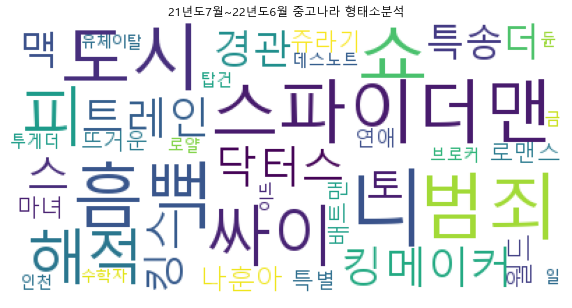

[('니', 3181),
 ('쇼', 2224),
 ('흠뻑', 2184),
 ('도시', 2157),
 ('범죄', 2157),
 ('스파이더맨', 2007),
 ('싸이', 1857),
 ('피', 1803),
 ('해적', 1457),
 ('킹메이커', 1324),
 ('스', 1298),
 ('킹스', 1293),
 ('닥터스', 1288),
 ('트레인', 1287),
 ('토', 1004),
 ('더', 990),
 ('경관', 986),
 ('맥', 977),
 ('특송', 951),
 ('나훈아', 933),
 ('월드', 932),
 ('쥬라기', 890),
 ('마녀', 873),
 ('로맨스', 867),
 ('뜨거운', 795),
 ('특별', 773),
 ('배트맨', 768),
 ('연애', 700),
 ('데스노트', 684),
 ('듄', 676),
 ('브로커', 661),
 ('탑건', 653),
 ('투게더', 643),
 ('금', 619),
 ('일', 599),
 ('인천', 597),
 ('로얄', 595),
 ('수학자', 589),
 ('유체이탈', 581),
 ('이드', 577)]

In [274]:
'''
Word Cloud 사용하기
- https://knowable.tistory.com/5
'''
from wordcloud import WordCloud
from konlpy.tag import Okt
from collections import Counter
import matplotlib.pyplot as plt
import platform

def makeokt(df, button =1):
    """ input: 원소가 text인 리스트 -> 형태소 분석 그림"""
    # open으로 txt파일을 열고 read()를 이용하여 읽는다.
    # text = open('test.txt', encoding='utf-8').read()
    okt = Okt() # Open Korean Text 객체 생성

    # okt함수를 통해 읽어들인 내용의 형태소를 분석한다.
    sentences_tag = []   
    for article in df['내용']:
        sentences_tag.extend(okt.pos(article))   # sentence_tag타입 리스트이고, 원소 타입은 튜플
    # print(sentences_tag)

    # 제거할 단어들을 이렇게 remove_set 으로 표시
    remove_set = ['입니다', '책', '급', '등', '권', '사용', '석', '편', '가능', '연석', '열', '메가박스', '롯데', '시네마', '양도', '예매', '판매', '티켓', '영화', '콘서트', '인권', '매', '장', '구역', '자리', '맨', '관람', '구합', '구매', '관', '서울', '콤보', '인', '뮤지컬', '공연', '정가', '대구', '청소년', '부산', '층', '스탠딩', '할인', '팝콘', '일요일', '토요일', '용산', '원가', '교환', '아이맥스', '구해', '부티크', '주말']
    noun_adj_list = []
    # tag가 명사이거나 형용사인 단어들만 noun_adj_list에 넣어준다.
    for word, tag in sentences_tag:
        if (tag in ['Noun' , 'Adjective']) & (word not in remove_set):
            noun_adj_list.append(word)

            

    # print(noun_adj_list)
    # 가장 많이 나온 단어부터 40개를 저장한다.
    counts = Counter(noun_adj_list)
    tags = counts.most_common(40)
    # print(tags)

    # WordCloud를 생성한다.
    # 한글을 분석하기위해 font를 한글로 지정해주어야 된다. macOS는 .otf , window는 .ttf 파일의 위치를
    # 지정해준다. (ex. '/Font/GodoM.otf')
    if platform.system() == 'Windows':
        path = r'c:\Windows\Fonts\malgun.ttf'
    elif platform.system() == 'Darwin': # Mac OS
        path = r'/System/Library/Fonts/AppleGothic'
    else:
        path = r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'

    wc = WordCloud(font_path=path, background_color="white", max_font_size=60)
    cloud = wc.generate_from_frequencies(dict(tags))

    # 생성된 WordCloud를 test.jpg로 보낸다.
    #cloud.to_file('test.jpg')
    if button == 1:
        plt.figure(figsize=(10, 8))
        plt.axis('off')
        plt.imshow(cloud)
        plt.title('21년도7월~22년도6월 중고나라 형태소분석')
        plt.show()

    return tags


tag =makeokt(df)
tag

In [151]:
# 상위 5개 추출 (흠뻑쇼, 범죄도시, 스파이더맨, 해적, 킹메이커)
print(tag[:20])
df['월'] = df['월'].astype(str)

[('니', 3181), ('쇼', 2224), ('흠뻑', 2184), ('도시', 2157), ('범죄', 2157), ('스파이더맨', 2007), ('싸이', 1857), ('피', 1803), ('해적', 1457), ('킹메이커', 1324), ('스', 1298), ('킹스', 1293), ('닥터스', 1288), ('트레인', 1287), ('토', 1004), ('더', 990), ('경관', 986), ('맥', 977), ('특송', 951), ('나훈아', 933)]


C:\Users\User\AppData\Local\Temp\ipykernel_17144\4264955031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['월'] = df['월'].astype(str)


In [152]:
joonggo = pd.read_excel('./Data/joonggo.xlsx', header = 6)
culture = pd.read_excel('./Data/culture.xlsx', header = 6)
joonggo['월'] = list(df['월'].unique())
joonggo
culture['월'] = list(df['월'].unique())
culture

c:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,날짜,흠뻑쇼,날짜.1,범죄도시,날짜.2,스파이더맨,날짜.3,해적,날짜.4,킹메이커,월
0,2021-07-01,0.02199,2021-07-01,3.58739,2021-07-01,6.34873,2021-07-01,1.29654,2021-07-01,0.41302,2021.7
1,2021-08-01,0.02590,2021-08-01,4.08907,2021-08-01,10.91690,2021-08-01,1.49064,2021-08-01,0.41040,2021.8
2,2021-09-01,0.01829,2021-09-01,4.85740,2021-09-01,9.21230,2021-09-01,3.45265,2021-09-01,0.34808,2021.9
3,2021-10-01,0.02203,2021-10-01,4.21320,2021-10-01,6.87107,2021-10-01,1.53970,2021-10-01,0.67898,2021.1
4,2021-11-01,0.02448,2021-11-01,7.70731,2021-11-01,12.78114,2021-11-01,0.95134,2021-11-01,2.70013,2021.11
5,2021-12-01,0.02615,2021-12-01,4.80057,2021-12-01,100.00000,2021-12-01,3.02347,2021-12-01,8.47494,2021.12
6,2022-01-01,0.01275,2022-01-01,5.91775,2022-01-01,33.70316,2022-01-01,25.89581,2022-01-01,41.13304,2022.1
7,2022-02-01,0.01219,2022-02-01,4.03680,2022-02-01,11.70472,2022-02-01,17.79815,2022-02-01,60.65482,2022.2
8,2022-03-01,0.05420,2022-03-01,3.11342,2022-03-01,9.53049,2022-03-01,14.02542,2022-03-01,18.18837,2022.3
9,2022-04-01,0.27201,2022-04-01,7.47124,2022-04-01,6.65747,2022-04-01,1.84539,2022-04-01,3.65556,2022.4


In [156]:
joonggo.drop(['날짜', '날짜.1', '날짜.2'], axis=1, inplace=True)
joonggo.set_index('월', inplace=True)
joonggo

,중고나라,당근마켓,번개장터
월,,,
2021.7,94.21018,34.98128,23.23606
2021.8,100.00000,38.14641,25.88276
2021.9,93.68939,37.02583,25.90673
2021.1,93.95914,36.73833,27.02037
2021.11,90.13147,34.35070,27.11969
2021.12,91.64068,34.77578,29.00584
2022.1,93.53587,36.84621,30.11949
2022.2,89.81097,38.10084,30.42716
2022.3,96.24037,40.42996,32.17105


In [155]:
culture.drop(['날짜', '날짜.1', '날짜.2', '날짜.3', '날짜.4'], axis=1, inplace=True)
culture.set_index('월', inplace=True)
culture

,흠뻑쇼,범죄도시,스파이더맨,해적,킹메이커
월,,,,,
2021.7,0.02199,3.58739,6.34873,1.29654,0.41302
2021.8,0.02590,4.08907,10.91690,1.49064,0.41040
2021.9,0.01829,4.85740,9.21230,3.45265,0.34808
2021.1,0.02203,4.21320,6.87107,1.53970,0.67898
2021.11,0.02448,7.70731,12.78114,0.95134,2.70013
2021.12,0.02615,4.80057,100.00000,3.02347,8.47494
2022.1,0.01275,5.91775,33.70316,25.89581,41.13304
2022.2,0.01219,4.03680,11.70472,17.79815,60.65482
2022.3,0.05420,3.11342,9.53049,14.02542,18.18837


<AxesSubplot:title={'center':'연도별 관심도 변화 (네이버 데이터랩)'}, xlabel='월'>

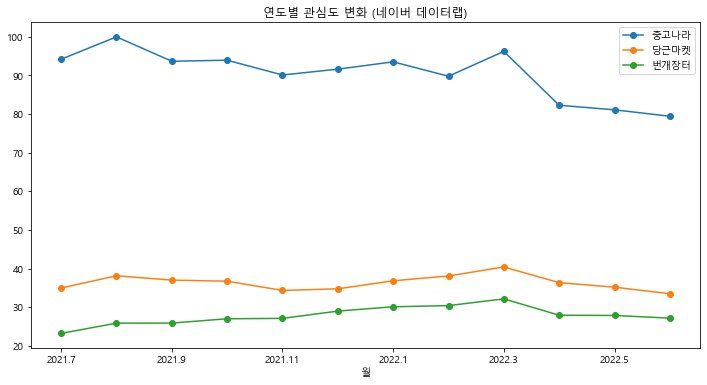

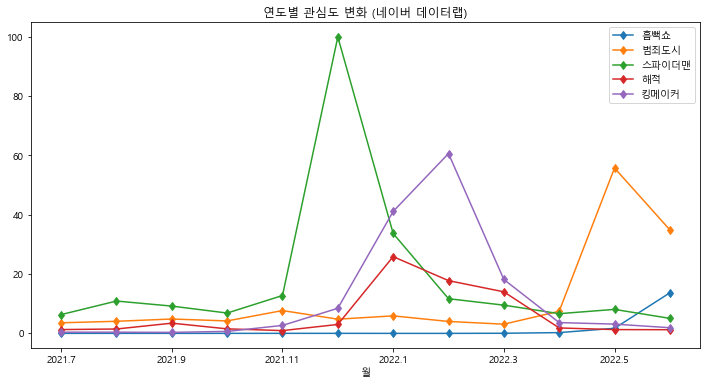

In [173]:
%matplotlib inline

if	platform.system()	==	'Windows':
    plt.rc('font',	family='Malgun Gothic')
else:
    plt.rc('font',	family='AppleGothic')
plt.rcParams['figure.figsize'] = (12,6)
joonggo.plot(marker = 'o', title= '연도별 관심도 변화 (네이버 데이터랩)')
culture.plot(marker = 'd', title= '연도별 관심도 변화 (네이버 데이터랩)')


#### 항목 별 세부사항
|항목|분류|일정(개봉일)|분석|
|------|---|---|---|
|흠뻑쇼|공연/콘서트|22-07-09 ~ 22-08-20|22-06-16에 티켓팅을 진행해서 22년도 6월에 네이버 관심도에서도 관심이 소폭 상승했다. 하지만 중고나라에서의 높은 관심도와는 다르게 네이버에선 다소 낮게 나온 모양새이다.|
|범죄도시|영화|22-05-18|높은 관심도와 비례해서 높은 성적을 얻었다, 관객수/손익분기점: 1260만/150만|
|스파이더맨|영화|21-12-15|국내에서 좋은 성적을 거뒀다, 국내관객수: 750만|
|해적|영화|22-01-26|22년도 1월에 정점을 찍고, 흥행에는 참패했다. 관객수/손익분기점: 130만/450만|
|킹메이커|영화|22-01-26|2월에 관심도 측면에서는 범죄도시2보다 높았지만 흥행에는 참패했다.  관객수/손익분기점: 78만/250만 |

- 출처
- http://www.mediatoday.co.kr/news/articleView.html?idxno=302543



### 월별로 중고나라 키워드 알아보기

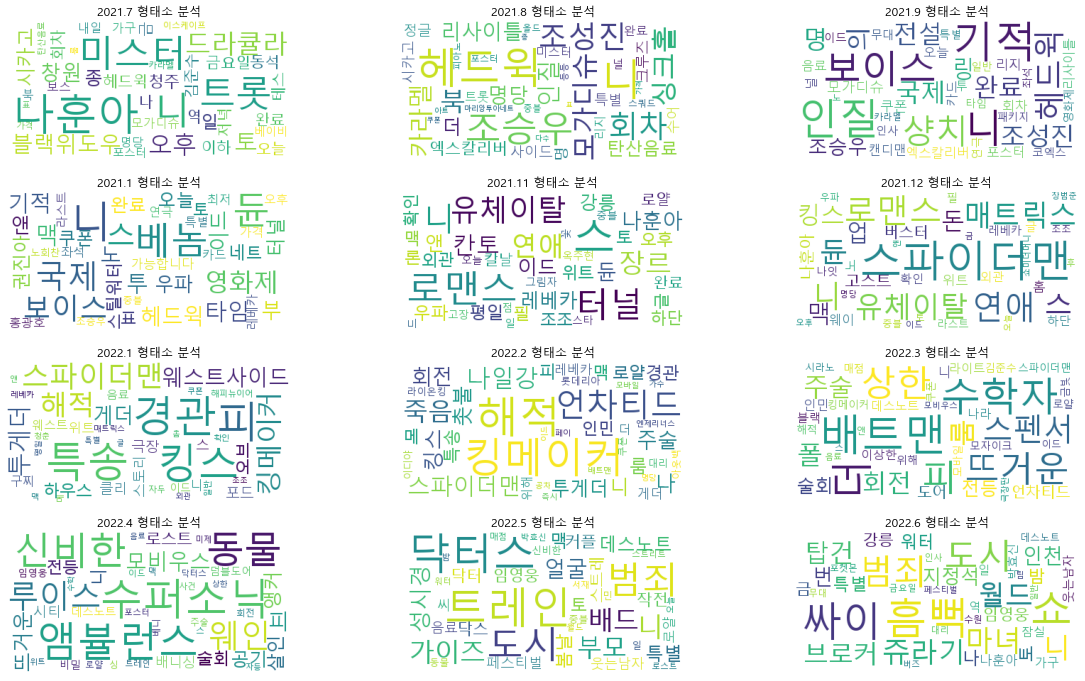

In [182]:
# 데이터 그룹화'
# 월별로 데이터 추출
month_tag = []
fig, axes = plt.subplots(4,3, figsize=(20,12))
for idx, val in enumerate(list(df['월'].unique())):
    cond = df['월'] == val
    plt.subplot(4,3,idx+1)
   
    if platform.system() == 'Windows':
        path = r'c:\Windows\Fonts\malgun.ttf'
    elif platform.system() == 'Darwin': # Mac OS
        path = r'/System/Library/Fonts/AppleGothic'
    else:
        path = r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'

    tags = makeokt(df[cond], button = 0)
    wc = WordCloud(font_path=path, background_color="white", max_font_size=60)
    cloud = wc.generate_from_frequencies(dict(tags))
    plt.axis('off')
    plt.imshow(cloud)
    plt.title(f"{val} 형태소 분석")
    
    # month_tag.append(makeokt(df[cond], button = 0))
    # plt.figure(figsize=(10, 8))

plt.show()


In [286]:
from operator import index


def tag_search(tag, word):
    """ input: word(단어) -> return: count 개수 """
    for name, val in tag:
        if name == word:
            return val
    
# tag_search(tag, '쥬라기')

 

# 범죄도시, 스파이더맨, 해적, 킹메이커, 킹스맨, 닥터스트레인지, 경관의피, 특송, 쥬라기월드, 마녀

movie = pd.read_csv('./Data/KOBIS_연도별박스오피스_2022-07-27.csv', header= 4, index_col = 0).iloc[:50, :].copy()
movie = movie.iloc[[0, 6, 8, 24, 15, 2, 17, 22, 3, 4]].copy()
movie
somelist = ['도시', '스파이더맨', '해적', '킹메이커', '킹스', '닥터스', '경관', '특송', '쥬라기', '마녀']
tag_value = [tag_search(tag, name) for name in somelist]
    

# # pd.DataFrame(tag_value)
# index = movie['영화명']
# movie['관객수']
total = pd.DataFrame({'관심도':tag_value, '관객수': movie['관객수']})
total['영화명'] = movie['영화명']
total['상영횟수']= movie['상영횟수']
total['매출액'] = movie['매출액'].str.replace(',','').astype(float)
total.set_index('영화명', inplace=True)
total['관객수'] = total['관객수'].str.replace(',','').astype(int)
total['상영횟수'] = total['상영횟수'].str.replace(',','').astype(int)
total.corr()

,관심도,관객수,상영횟수,매출액
관심도,1.000000,0.586570,0.700502,0.577440
관객수,0.586570,1.000000,0.966063,0.999813
상영횟수,0.700502,0.966063,1.000000,0.964388
매출액,0.577440,0.999813,0.964388,1.000000


In [276]:
movie

,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사
순위,,,,,,,,,,
1,범죄도시 2,2022-05-18,"131,240,536,100",22.5%,"12,687,958","2,521","355,261",한국,한국,"주식회사 에이비오엔터테인먼트,메가박스중앙(주)플러스엠"
3,닥터 스트레인지: 대혼돈의 멀티버스,2022-05-04,"62,648,774,870",10.7%,"5,884,595","2,691","211,097",미국,미국,월트디즈니컴퍼니코리아 유한책임회사
4,쥬라기 월드: 도미니언,2022-06-01,"29,237,126,310",5.0%,"2,837,415","2,218","86,427",미국,미국,유니버설픽쳐스인터내셔널 코리아(유)
5,마녀(魔女) Part2. The Other One,2022-06-15,"28,901,379,670",4.9%,"2,803,037","1,796","94,830",한국,한국,(주)넥스트엔터테인먼트월드(NEW)
7,스파이더맨: 노 웨이 홈,2021-12-15,"19,496,498,450",3.3%,"1,991,050","2,162","131,941",미국,미국,소니픽쳐스엔터테인먼트코리아주식회사극장배급지점
9,해적: 도깨비 깃발,2022-01-26,"12,523,963,990",2.1%,"1,339,242","1,708","117,320",한국,한국,롯데컬처웍스(주)롯데엔터테인먼트
16,킹메이커,2022-01-26,"7,317,204,610",1.3%,"775,851","1,185","80,071",한국,한국,메가박스중앙(주)플러스엠
18,경관의 피,2022-01-05,"6,687,389,520",1.1%,"679,503","1,187","57,409",한국,한국,(주)에이스메이커무비웍스
23,특송,2022-01-12,"4,172,193,200",0.7%,"443,177",996,"48,006",한국,한국,(주)넥스트엔터테인먼트월드(NEW)


### <span style='color:Blue'> 내용정리 </span>

- 중고나라의 영화/연극/공연 컨텐츠를 통해 영화/연극/공연 트렌드의 변화를 살펴보았다.
- 알 수 있던 점: 
    1. 최근 1년동안의 영화/공연 트렌드 파악 가능
    2. 흥행이랑 관심도는 상관관계 0.9로 비례하는 경향이 있다. 
    3. 중고나라 구매가 활성화 된 지금, 어떤 항목을 사기 쉽고, 어떤 항목을 팔아도 될지 판단을 준다.
        - 항목이 많다: 사기 쉽다, 반대로 팔기에는 경쟁자가 많아서 어려울 수 있고, 한편으로는 수요자가 많아서 팔기가 쉬울 수 있다.
        - 항목이 적다: 사기가 어렵다, 반대로 팔기에는 경쟁자가 적어서 쉬울 수 있고, 한편으로는 수요자가 적어서 팔기가 어려울 수 있다.
### <span style='color:Blue'> 결론 </span>
- 중고나라에서의 영화 관련해서 사전 티켓 매매 내용의 게시글 수를 바탕으로 흥행을 예측해 볼 수 있다.